## EDA with NLP method

In [1]:
# import common functions
import sys
sys.path.append('../common/')
from functions import get_view_counts

import pandas as pd
import numpy as np

from pymongo import MongoClient 

### Make a dataframe from mongodb

**Collections**
* video_detail : contains title, url, published date, video_id of video
* view_count : contains # of views, comments, likes
* comments : contatins comments for video


In [2]:
# connect mongodb through ssh tunnel
connection = MongoClient(port=47017)
db = connection['youtube_scrap']

### Load video detail to dataframe

In [3]:
# load from mongodb
video_coll = db['video_detail']
video_cur = video_coll.find({})
videos = [video for video in video_cur]

In [4]:
# make a dataframe
video_df = pd.DataFrame(videos)
video_df.head()

,_id,has_comment,published,published_date,title,url,video_id
0,5d13aed7e70a248460e5833f,Y,"Jun 19, 2019",2019-06-19,Red Velvet 레드벨벳 '짐살라빔 (Zimzalabim)' MV,https://www.youtube.com/watch?v=YBnGBb1wg98,YBnGBb1wg98
1,5d13aedee70a248460e58340,Y,"Apr 4, 2019",2019-04-04,BLACKPINK - 'Kill This Love' M/V,https://www.youtube.com/watch?v=2S24-y0Ij3Y,2S24-y0Ij3Y
2,5d13aee5e70a248460e58341,Y,"Apr 12, 2019",2019-04-12,BTS (방탄소년단) '작은 것들을 위한 시 (Boy With Luv) feat. ...,https://www.youtube.com/watch?v=XsX3ATc3FbA,XsX3ATc3FbA
3,5d13aeebe70a248460e58342,Y,"Jun 19, 2019",2019-06-19,"Stray Kids ""부작용(Side Effects)"" M/V",https://www.youtube.com/watch?v=5rPluw_-Eb4,5rPluw_-Eb4
4,5d13aef1e70a248460e58343,Y,"Jun 13, 2019",2019-06-13,SOMI (전소미) - 'BIRTHDAY' M/V,https://www.youtube.com/watch?v=oDJ4ct59NC4,oDJ4ct59NC4


### Load comments to dataframe

In [5]:
# load from mongodb
comments_coll = db['comments']
comments_cur = comments_coll.find({})
comments = [comment for comment in comments_cur]

In [6]:
# make a dataframe
comments_df = pd.DataFrame(comments)
comments_df.head()

,_id,comment,sentiment,video_id
0,5d13bbade70a248460e583ee,How many international fans are here ?\n\n\n\n...,0.786539,YBnGBb1wg98
1,5d13bbaee70a248460e583ef,When the kpop world is influenzed by western s...,0.802004,YBnGBb1wg98
2,5d13bbaee70a248460e583f0,🎢Zimzalabim🎢\nFull Daily Views (6pm KST)\n\nDa...,0.855145,YBnGBb1wg98
3,5d13bbaee70a248460e583f1,26M yayyy..!! The only one kpop i STAN RED VEL...,0.653234,YBnGBb1wg98
4,5d13bbaee70a248460e583f2,Some k-company: make their artist lipsinc to f...,0.880323,YBnGBb1wg98


In [7]:
temp = pd.merge(video_df, comments_df, on='video_id')

In [8]:
temp.head()

,_id_x,has_comment,published,published_date,title,url,video_id,_id_y,comment,sentiment
0,5d13aed7e70a248460e5833f,Y,"Jun 19, 2019",2019-06-19,Red Velvet 레드벨벳 '짐살라빔 (Zimzalabim)' MV,https://www.youtube.com/watch?v=YBnGBb1wg98,YBnGBb1wg98,5d13bbade70a248460e583ee,How many international fans are here ?\n\n\n\n...,0.786539
1,5d13aed7e70a248460e5833f,Y,"Jun 19, 2019",2019-06-19,Red Velvet 레드벨벳 '짐살라빔 (Zimzalabim)' MV,https://www.youtube.com/watch?v=YBnGBb1wg98,YBnGBb1wg98,5d13bbaee70a248460e583ef,When the kpop world is influenzed by western s...,0.802004
2,5d13aed7e70a248460e5833f,Y,"Jun 19, 2019",2019-06-19,Red Velvet 레드벨벳 '짐살라빔 (Zimzalabim)' MV,https://www.youtube.com/watch?v=YBnGBb1wg98,YBnGBb1wg98,5d13bbaee70a248460e583f0,🎢Zimzalabim🎢\nFull Daily Views (6pm KST)\n\nDa...,0.855145
3,5d13aed7e70a248460e5833f,Y,"Jun 19, 2019",2019-06-19,Red Velvet 레드벨벳 '짐살라빔 (Zimzalabim)' MV,https://www.youtube.com/watch?v=YBnGBb1wg98,YBnGBb1wg98,5d13bbaee70a248460e583f1,26M yayyy..!! The only one kpop i STAN RED VEL...,0.653234
4,5d13aed7e70a248460e5833f,Y,"Jun 19, 2019",2019-06-19,Red Velvet 레드벨벳 '짐살라빔 (Zimzalabim)' MV,https://www.youtube.com/watch?v=YBnGBb1wg98,YBnGBb1wg98,5d13bbaee70a248460e583f2,Some k-company: make their artist lipsinc to f...,0.880323


### Load view_count to dataframe

In [9]:
view_count_coll = db['view_count']
view_count_cur = view_count_coll.find({})
view_count_cur.next()

{'_id': ObjectId('5d13b6a99ec6103a9817d745'),
 'title': '모모랜드(MOMOLAND) - 바나나차차(뽀로로 삽입곡) M/V',
 'view_count': 502364,
 'comment_count': 1530,
 'like_count': 25277,
 'timestamp': datetime.datetime(2019, 6, 26, 18, 17, 9, 330000),
 'video_id': 'kxdEoCDzm-k'}

In [10]:
# single video has a lot of view counts by time
# need to get max value by title (need to change to video_id)
view_max_count =[row for row in view_count_coll.aggregate([
    {'$group' : {'_id':'$title', 
                 'view_count':{'$max':'$view_count'}, 
                 'like_count':{'$max':'$like_count'},
                 'comment_count':{'$max':'$comment_count'},
                }
    }
])]

In [11]:
view_count_df = pd.DataFrame(view_max_count)
view_count_df.head()

,_id,comment_count,like_count,view_count
0,EVERGLOW (에버글로우) - 봉봉쇼콜라 (Bon Bon Chocolat) MV,54397,907891,32747223
1,ONEWE(원위) '다 추억(Reminisce about All)' MV,1837,21177,130831
2,IZ*ONE (아이즈원) - '라비앙로즈 (La Vie en Rose)' MV Pe...,3185,133010,5017465
3,[MV] So!YoON!(황소윤) _ HOLIDAY,329,5333,140850
4,[MV] Yoon Mi Rae(윤미래) _ Don`t forget me(잊어가지마)...,265,7257,270020


In [12]:
view_count_df.columns = ['title', 'comment_count', 'like_count', 'view_count']
view_count_df.head()

,title,comment_count,like_count,view_count
0,EVERGLOW (에버글로우) - 봉봉쇼콜라 (Bon Bon Chocolat) MV,54397,907891,32747223
1,ONEWE(원위) '다 추억(Reminisce about All)' MV,1837,21177,130831
2,IZ*ONE (아이즈원) - '라비앙로즈 (La Vie en Rose)' MV Pe...,3185,133010,5017465
3,[MV] So!YoON!(황소윤) _ HOLIDAY,329,5333,140850
4,[MV] Yoon Mi Rae(윤미래) _ Don`t forget me(잊어가지마)...,265,7257,270020


In [13]:
# merge with temp dataframe
df = pd.merge(temp, view_count_df, on='title')
df.head()

,_id_x,has_comment,published,published_date,title,url,video_id,_id_y,comment,sentiment,comment_count,like_count,view_count
0,5d13aed7e70a248460e5833f,Y,"Jun 19, 2019",2019-06-19,Red Velvet 레드벨벳 '짐살라빔 (Zimzalabim)' MV,https://www.youtube.com/watch?v=YBnGBb1wg98,YBnGBb1wg98,5d13bbade70a248460e583ee,How many international fans are here ?\n\n\n\n...,0.786539,164559,1596901,26850555
1,5d13aed7e70a248460e5833f,Y,"Jun 19, 2019",2019-06-19,Red Velvet 레드벨벳 '짐살라빔 (Zimzalabim)' MV,https://www.youtube.com/watch?v=YBnGBb1wg98,YBnGBb1wg98,5d13bbaee70a248460e583ef,When the kpop world is influenzed by western s...,0.802004,164559,1596901,26850555
2,5d13aed7e70a248460e5833f,Y,"Jun 19, 2019",2019-06-19,Red Velvet 레드벨벳 '짐살라빔 (Zimzalabim)' MV,https://www.youtube.com/watch?v=YBnGBb1wg98,YBnGBb1wg98,5d13bbaee70a248460e583f0,🎢Zimzalabim🎢\nFull Daily Views (6pm KST)\n\nDa...,0.855145,164559,1596901,26850555
3,5d13aed7e70a248460e5833f,Y,"Jun 19, 2019",2019-06-19,Red Velvet 레드벨벳 '짐살라빔 (Zimzalabim)' MV,https://www.youtube.com/watch?v=YBnGBb1wg98,YBnGBb1wg98,5d13bbaee70a248460e583f1,26M yayyy..!! The only one kpop i STAN RED VEL...,0.653234,164559,1596901,26850555
4,5d13aed7e70a248460e5833f,Y,"Jun 19, 2019",2019-06-19,Red Velvet 레드벨벳 '짐살라빔 (Zimzalabim)' MV,https://www.youtube.com/watch?v=YBnGBb1wg98,YBnGBb1wg98,5d13bbaee70a248460e583f2,Some k-company: make their artist lipsinc to f...,0.880323,164559,1596901,26850555


## First spaghetti model

### Make a simple model with basic TFIDF & Linear Regression

In [14]:
# import prerequisties
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import stop_words
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline


In [15]:
X = df['comment']

In [16]:
y = df['view_count']

In [17]:
# Parameters for TF-IDF vectorize
ngrams_1 = {
    'ngram_range': (1, 1),
    'stop_words': 'english',
    'dtype': 'int32',
    'strip_accents': 'unicode',
    'decode_error': 'replace',
    'analyzer': 'word',
    'min_df': 2
}

In [18]:
# Pipeline TFIDF & LinearRegression
pp_first = Pipeline([
    ('tfidf', TfidfVectorizer(ngrams_1)),
    ('classifier', LinearRegression())
])

In [19]:
# Split train & test data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=27)

In [20]:
pp_first.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8',
        input={'ngram_range': (1, 1), 'stop_words': 'english', 'dtype': 'int32', 'strip_accents': 'unicode', 'decode_error': 'replace', 'analyzer': 'word', ...ssifier', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [21]:
pp_first.score(X_train, y_train)

0.8574741864694009

In [22]:
pp_first.score(X_test, y_test)

-0.5816135499537327

<span style='color:red'> **Too Bad Score, find another way** </span>

### Set sentiment score to comments

In [23]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

from datetime import datetime

In [24]:
sentiment = TextBlob(comments_df.loc[0, 'comment'], 
                     analyzer=NaiveBayesAnalyzer()).sentiment
sentiment

Sentiment(classification='pos', p_pos=0.7865389082121107, p_neg=0.21346109178788916)

In [25]:
# It takes sooooooo long time. Run it with cloud server

# coll = db['comments']
# cur = coll.find({ 'sentiment' : { '$exists': False } }).limit(100)
# comments = [comment for comment in cur]

# for i, comment in enumerate(comments):
#     sentiment = TextBlob(comment['comment'], analyzer=NaiveBayesAnalyzer()).sentiment
#     coll.update_one({"_id": comment["_id"]}, 
#         {"$set": {"sentiment": sentiment.p_pos}})

#     print(datetime.now(), i, comment['comment'][:10], sentiment.p_pos)
pass

In [26]:
comments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29764 entries, 0 to 29763
Data columns (total 4 columns):
_id          29764 non-null object
comment      29764 non-null object
sentiment    27870 non-null float64
video_id     29764 non-null object
dtypes: float64(1), object(3)
memory usage: 930.2+ KB


In [27]:
# Set NA to 0.5 (netual)
comments_df['sentiment'].fillna(0.5, inplace=True)

In [28]:
sentiment_df = comments_df.groupby('video_id').mean()

In [29]:
temp_df = pd.merge(video_df, sentiment_df, on='video_id')
len(temp_df)

259

In [30]:
df = pd.merge(temp_df, view_count_df, on='title')

In [31]:
len(df)

172

### Make a new model with numeric features

In [32]:
df.head(1)

,_id,has_comment,published,published_date,title,url,video_id,sentiment,comment_count,like_count,view_count
0,5d13aed7e70a248460e5833f,Y,"Jun 19, 2019",2019-06-19,Red Velvet 레드벨벳 '짐살라빔 (Zimzalabim)' MV,https://www.youtube.com/watch?v=YBnGBb1wg98,YBnGBb1wg98,0.662094,164559,1596901,26850555


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 171
Data columns (total 11 columns):
_id               172 non-null object
has_comment       172 non-null object
published         172 non-null object
published_date    172 non-null datetime64[ns]
title             172 non-null object
url               172 non-null object
video_id          172 non-null object
sentiment         172 non-null float64
comment_count     172 non-null int64
like_count        172 non-null int64
view_count        172 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 16.1+ KB


#### Dataset with comment_count, like_count, and sentiment

In [34]:
X = df[['comment_count', 'like_count', 'sentiment']]

In [35]:
y = df['view_count']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=27)

#### Using Linear Regression Model

In [37]:
lr = LinearRegression()

In [38]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [39]:
lr.score(X_test, y_test)

0.7977008691967251

In [40]:
lr.score(X_train, y_train)

0.7082374558383007

In [41]:
lr.coef_

array([-1.10884419e+02,  7.51777094e+01, -2.35276340e+08])

<span style='color:blue'> **Not bad, but too small dataset, find more ways to go** </span>

## Prediction Model with Prophet

In [42]:
from fbprophet import Prophet
from matplotlib import pyplot as plt
from matplotlib import dates as mdates

### Make a dataframe from mongodb

**Collections**
* video_detail : contains title, url, published date, video_id of video
* view_count : contains # of views, comments, likes

In [43]:
# connect mongodb through ssh tunnel
connection = MongoClient(port=47017)
db = connection['youtube_scrap']

### Load video detail to dataframe

In [44]:
# load from mongodb
video_coll = db['video_detail']
video_cur = video_coll.find({})
videos = [video for video in video_cur]

In [45]:
# select a video
video = videos[9]

In [46]:
# get view_counts for selected video
df = get_view_counts(db, video['video_id'])
df.head()

,_id,comment_count,like_count,timestamp,title,video_id,view_count
0,5d13b7a19ec6103a9817d75e,4495,183308,2019-06-26 18:21:16.925,Dream Glow (BTS World Original Soundtrack),HwT9oKqfUxY,5505871
1,5d13c37b9ec6103a9817d89b,4497,183393,2019-06-26 19:11:51.844,Dream Glow (BTS World Original Soundtrack),HwT9oKqfUxY,5509723
2,5d13c4779ec6103a9817d8af,4497,183397,2019-06-26 19:16:03.135,Dream Glow (BTS World Original Soundtrack),HwT9oKqfUxY,5510424
3,5d13cdb89ec6103a9817d993,4498,183476,2019-06-26 19:55:32.016,Dream Glow (BTS World Original Soundtrack),HwT9oKqfUxY,5514608
4,5d13d3ad9ec6103a9817da31,4501,183530,2019-06-26 20:20:57.911,Dream Glow (BTS World Original Soundtrack),HwT9oKqfUxY,5517267


### Make a prediction with Prophet

In [47]:
# initialize Prophet model
m = Prophet()

In [48]:
# prepare dataframe for Prophet
est_df = df[['timestamp', 'view_count']]
est_df.columns = ['ds', 'y']
est_df.head()

,ds,y
0,2019-06-26 18:21:16.925,5505871
1,2019-06-26 19:11:51.844,5509723
2,2019-06-26 19:16:03.135,5510424
3,2019-06-26 19:55:32.016,5514608
4,2019-06-26 20:20:57.911,5517267


In [49]:
# fit to model
m.fit(est_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/Users/teo/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [50]:
# make dataframe for estimatin after 3 days 
future = m.make_future_dataframe(periods=3)
future.tail()

,ds
586,2019-07-11 16:04:15.549
587,2019-07-11 16:13:17.502
588,2019-07-12 16:13:17.502
589,2019-07-13 16:13:17.502
590,2019-07-14 16:13:17.502


In [51]:
# perform predict 
forecast = m.predict(future)

In [52]:
# extracting some data
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
586,2019-07-11 16:04:15.549,6.485274e+06,6.484173e+06,6.486462e+06
587,2019-07-11 16:13:17.502,6.485532e+06,6.484376e+06,6.486658e+06
588,2019-07-12 16:13:17.502,6.527750e+06,6.516863e+06,6.539778e+06
589,2019-07-13 16:13:17.502,6.572677e+06,6.535580e+06,6.612606e+06
590,2019-07-14 16:13:17.502,6.616788e+06,6.546981e+06,6.691389e+06


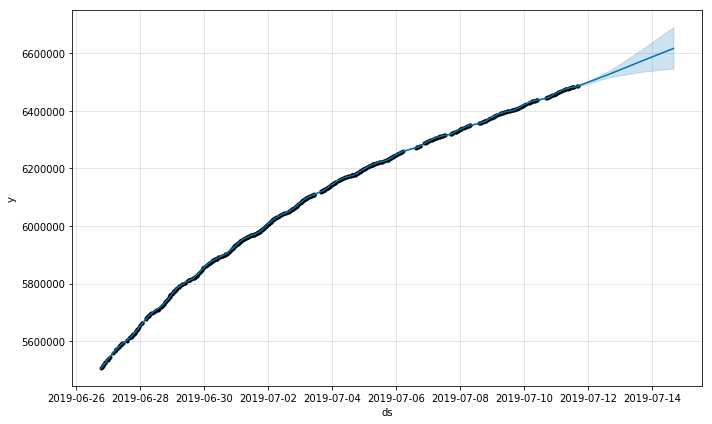

In [53]:
# Draw a chart with forecast (prophet function)
fig1 = m.plot(forecast)

### What's inside forecast

In [54]:
# extract last 3 rows in forecast 
# (but one more row is needed for chart)
df = forecast.tail(4)
df

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
587,2019-07-11 16:13:17.502,6.490545e+06,6.484376e+06,6.486658e+06,6.490545e+06,6.490545e+06,-5012.735950,-5012.735950,-5012.735950,-3862.07454,-3862.07454,-3862.07454,-1150.661411,-1150.661411,-1150.661411,0.0,0.0,0.0,6.485532e+06
588,2019-07-12 16:13:17.502,6.533251e+06,6.516863e+06,6.539778e+06,6.522320e+06,6.545072e+06,-5500.874890,-5500.874890,-5500.874890,-3862.07454,-3862.07454,-3862.07454,-1638.800350,-1638.800350,-1638.800350,0.0,0.0,0.0,6.527750e+06
589,2019-07-13 16:13:17.502,6.575956e+06,6.535580e+06,6.612606e+06,6.538847e+06,6.616098e+06,-3278.827712,-3278.827712,-3278.827712,-3862.07454,-3862.07454,-3862.07454,583.246828,583.246828,583.246828,0.0,0.0,0.0,6.572677e+06
590,2019-07-14 16:13:17.502,6.618662e+06,6.546981e+06,6.691389e+06,6.548478e+06,6.693398e+06,-1874.085494,-1874.085494,-1874.085494,-3862.07454,-3862.07454,-3862.07454,1987.989046,1987.989046,1987.989046,0.0,0.0,0.0,6.616788e+06


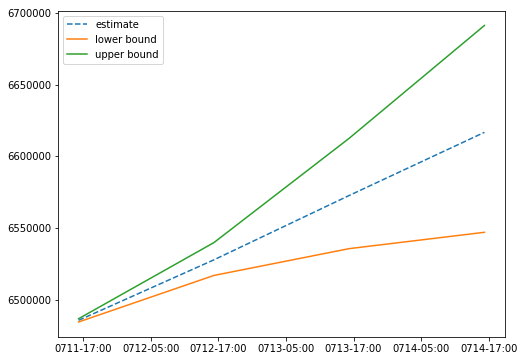

In [55]:
# Draw chart with 3 values in forecast
# yhat, yhat_upper, yhat_lower
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(df['ds'], df['yhat'], '--', label='estimate')
ax.plot(df['ds'], df['yhat_lower'], '-', label='lower bound')
ax.plot(df['ds'], df['yhat_upper'], '-', label='upper bound')

hours = mdates.HourLocator(interval = 12)
h_fmt = mdates.DateFormatter('%m%d-%H:%M')

ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt)
plt.legend()
plt.show()

### Chart for past + forecast

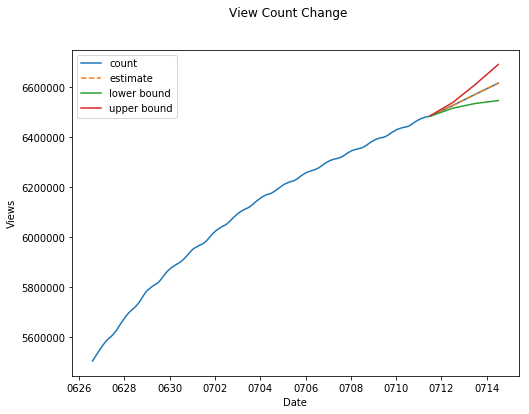

In [61]:
# Draw chart with 3 values in forecast
# yhat, yhat_upper, yhat_lower
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(forecast['ds'], forecast['yhat'], '-', label='count')
ax.plot(df['ds'], df['yhat'], '--', label='estimate')
ax.plot(df['ds'], df['yhat_lower'], '-', label='lower bound')
ax.plot(df['ds'], df['yhat_upper'], '-', label='upper bound')

fig.suptitle('View Count Change')
ax.set_xlabel('Date')
ax.set_ylabel('Views')
hours = mdates.HourLocator(interval = 48)
h_fmt = mdates.DateFormatter('%m%d')

ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt)
plt.legend()
plt.show()

In [57]:
# Get a prediction after 3 days
forecast['yhat'].tail(1).values[0]

6616787.829358322